# Propensity score matching
Split the cancer patients into test and train sets

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
path_meta = pd.read_csv("C://Users//maryp//OneDrive//Documents//CDT//Year3//DenoisingPaper//MetaData.csv")
print(path_meta.shape)
path_meta.head()

(38, 7)


,RecordingID,Type,Date,SubjectID,Sex,Age,Pathology
0,110,p,21/01/1998,1307,m,62,Vocal cord cancer
1,500,p,22/04/1998,1373,m,44,Vocal cord cancer
2,731,p,28/05/1998,1423,m,66,Hypopharyngeal tumor
3,742,p,29/05/1998,1425,m,43,Vocal cord cancer
4,820,p,24/06/1998,1432,m,69,Dysplastic larynx


PSM

In [3]:
healthy_meta = pd.read_csv("C://Users//maryp//OneDrive//Documents//Python//Year3//Denoising//healthy_meta.csv", index_col=0)
healthy_meta = healthy_meta.drop_duplicates()
print(healthy_meta.shape)
healthy_meta.head()

(687, 6)


,RecordingID,Type,Date,SubjectID,Sex,Age
0,1543,n,26/11/1999,1024,w,9
10,803,n,09/06/1998,707,m,16
11,807,n,09/06/1998,711,m,16
12,808,n,09/06/1998,712,m,16
13,835,n,25/06/1998,722,w,16


In [4]:
df = pd.concat([path_meta, healthy_meta])
print(df.shape)
df.head()

(725, 7)


,RecordingID,Type,Date,SubjectID,Sex,Age,Pathology
0,110,p,21/01/1998,1307,m,62,Vocal cord cancer
1,500,p,22/04/1998,1373,m,44,Vocal cord cancer
2,731,p,28/05/1998,1423,m,66,Hypopharyngeal tumor
3,742,p,29/05/1998,1425,m,43,Vocal cord cancer
4,820,p,24/06/1998,1432,m,69,Dysplastic larynx


In [5]:
df['Type'] = df['Type'].map({'p': 1, 'n': 0})
df['Sex'] = df['Sex'].map({'m': 1, 'w': 0})

In [6]:
df.head()

,RecordingID,Type,Date,SubjectID,Sex,Age,Pathology
0,110,1,21/01/1998,1307,1,62,Vocal cord cancer
1,500,1,22/04/1998,1373,1,44,Vocal cord cancer
2,731,1,28/05/1998,1423,1,66,Hypopharyngeal tumor
3,742,1,29/05/1998,1425,1,43,Vocal cord cancer
4,820,1,24/06/1998,1432,1,69,Dysplastic larynx


In [8]:
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

In [9]:
psm = PsmPy(df, treatment='Type', indx='RecordingID', exclude = ['Date', 'SubjectID', 'Pathology'])

In [10]:
psm.logistic_ps(balance = False)

In [11]:
psm.predicted_data

,RecordingID,Sex,Age,propensity_score,propensity_logit,Type
0,1543,0,9,0.003549,-5.637561,0
1,803,1,16,0.017206,-4.045121,0
2,807,1,16,0.017206,-4.045121,0
3,808,1,16,0.017206,-4.045121,0
4,835,0,16,0.006157,-5.084040,0
...,...,...,...,...,...,...
720,1968,0,58,0.146425,-1.762917,1
721,2069,1,51,0.217973,-1.277518,1
722,2343,1,75,0.650279,0.620267,1
723,2402,1,71,0.575413,0.303969,1


In [12]:
psm.knn_matched(matcher='propensity_logit', replacement=False, caliper=None)

In [13]:
psm.df_matched

,RecordingID,Sex,Age,propensity_score,propensity_logit,Type,matched_ID
0,110,1,62,0.399464,-0.407700,1,90.0
1,500,1,44,0.138115,-1.831038,1,963.0
2,731,1,66,0.477165,-0.091402,1,100.0
3,742,1,43,0.128968,-1.910113,1,1005.0
4,820,1,69,0.536391,0.145821,1,96.0
...,...,...,...,...,...,...,...
71,72,0,58,0.146425,-1.762917,0,NaN
72,1008,1,50,0.204795,-1.356592,0,NaN
73,1969,0,63,0.203017,-1.367545,0,NaN
74,852,0,63,0.203017,-1.367545,0,NaN


In [14]:
matched_df = psm.df_matched.copy()

In [15]:
matched_df['Type'] = matched_df['Type'].map({1: 'p', 0: 'n'})
matched_df['Sex'] = matched_df['Sex'].map({1: 'm', 0: 'w'})

In [16]:
print(matched_df.shape)
print(matched_df[['Sex', 'Type']].value_counts())

(76, 7)
Sex  Type
m    p       35
     n       25
w    n       13
     p        3
dtype: int64


In [17]:
print(matched_df.shape)
matched_df.head()

(76, 7)


,RecordingID,Sex,Age,propensity_score,propensity_logit,Type,matched_ID
0,110,m,62,0.399464,-0.407700,p,90.0
1,500,m,44,0.138115,-1.831038,p,963.0
2,731,m,66,0.477165,-0.091402,p,100.0
3,742,m,43,0.128968,-1.910113,p,1005.0
4,820,m,69,0.536391,0.145821,p,96.0


In [18]:
chosen_healthy = healthy_meta[healthy_meta['RecordingID'].isin(matched_df['RecordingID'])]

In [19]:
dataset = pd.concat([path_meta, chosen_healthy])

In [20]:
dataset.shape

(76, 7)

[Text(1, 0, 'healthy'), Text(2, 0, 'cancer')]

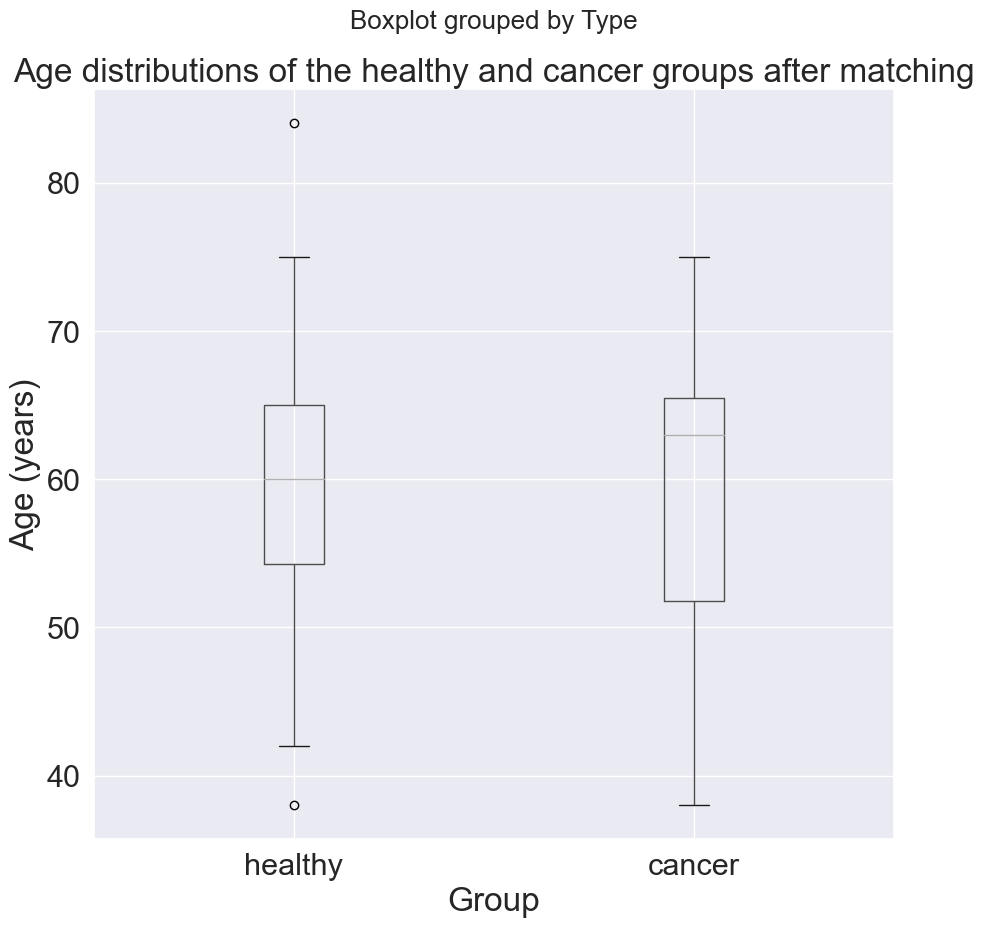

In [21]:
ax = dataset.boxplot('Age', by='Type', fontsize=22, figsize=(10, 10))
ax.set_ylabel('Age (years)', fontsize=24)
ax.set_xlabel('Group', fontsize=24)
ax.set_title('Age distributions of the healthy and cancer groups after matching', fontsize=24)
ax.set_xticklabels(['healthy', 'cancer'])

[Text(1, 0, 'healthy'), Text(2, 0, 'cancer')]

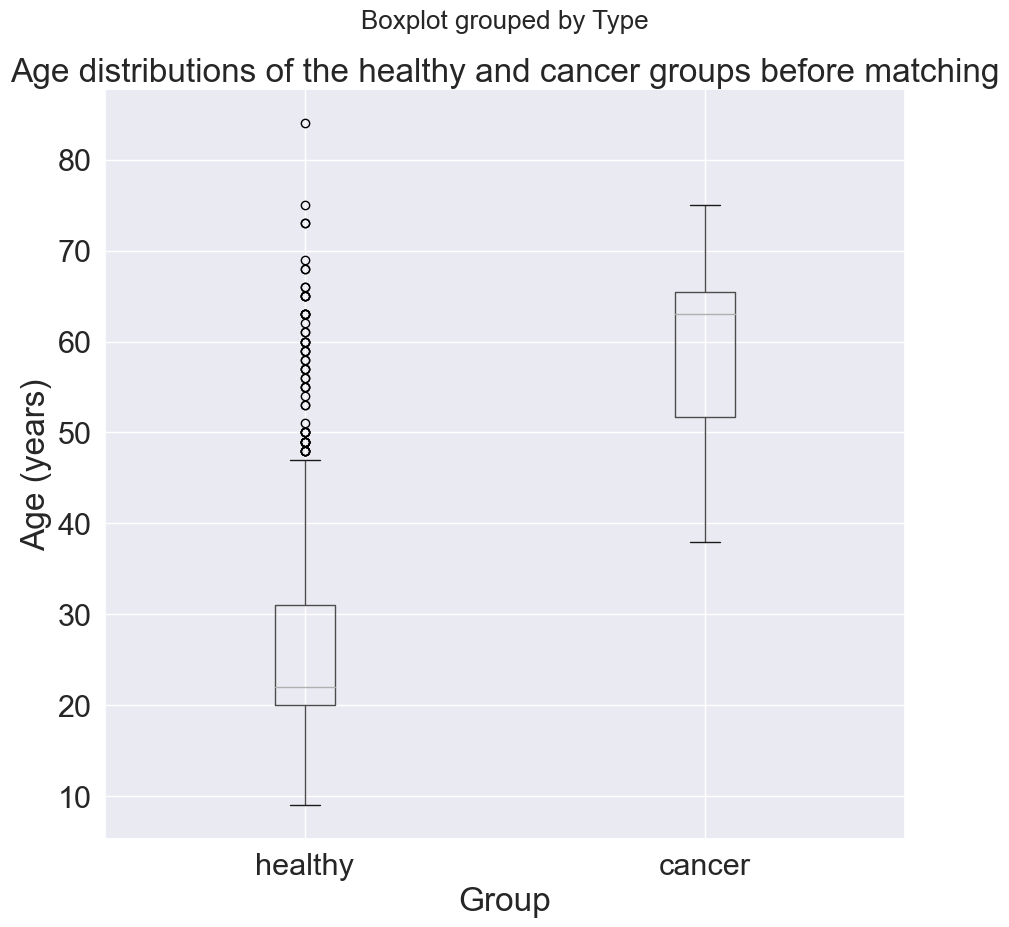

In [22]:
ax = df.boxplot('Age', by='Type', fontsize=22, figsize=(10, 10))
ax.set_ylabel('Age (years)', fontsize=24)
ax.set_xlabel('Group', fontsize=24)
ax.set_title('Age distributions of the healthy and cancer groups before matching', fontsize=24)
ax.set_xticklabels(['healthy', 'cancer'])

In [24]:
np.mean(dataset[dataset['Type']=='p']['Age'])

59.10526315789474

In [25]:
dataset.to_csv('MatchedData.csv')

# Split Test and Train

In [23]:
dataset['Pathology'] = dataset['Pathology'].fillna('Healthy')

In [24]:
X_train, X_test = train_test_split(dataset, test_size=0.3, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [25]:
X_train.shape

(53, 7)

In [26]:
X_test.shape

(23, 7)

In [27]:
X_train[['Sex', 'Pathology']].value_counts()

Sex  Pathology           
m    Healthy                 18
     Vocal cord cancer       16
w    Healthy                 10
m    Hypopharyngeal tumor     5
     Dysplastic dysphonia     1
     Larynx tumor             1
     Mesopharyngeal tumor     1
w    Epiglottic cancer        1
dtype: int64

In [28]:
X_test[['Sex', 'Pathology']].value_counts()

Sex  Pathology           
m    Healthy                 7
     Vocal cord cancer       5
     Larynx tumor            3
w    Healthy                 3
m    Carcinoma in situ       1
     Dysplastic larynx       1
     Hypopharyngeal tumor    1
w    Larynx tumor            1
     Vocal cord cancer       1
dtype: int64

In [29]:
X_train.to_csv("trainSet.csv")

In [30]:
X_test.to_csv("testSet.csv")